# 2D ring resonator

This is a simple example of using Tidy3D to perform a 2D simulation of a ring resonator side coupled to a dielectric waveguide.

<img src="img/ring.png" alt="diagram" width="300"/>

With a center wavelength of 500 nm and 10 nm resolution, this is a challenging FDTD problem because of the large simulation size.  The simulation contains 1 million grid points to model the entire domain and 290,000 time steps to capture the resonance of the ring.

With Tidy3D, we perform each simulation in just a few minutes.

In [1]:
# standard python imports
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

# tidy3D import
import tidy3d.web as web
import tidy3d as td

Using Tidy3D credentials from stored file


## Initial setup

Our ring resonator will include a ring centered at (0,0) with a waveguide just above the ring spanning the x direction.

```    
                      (waveguide)      
                in -> ========== -> out
                           0
                      (resonator)
   ```

In [2]:
# resolution
dl = 0.01

# define geometry
wg_width = 0.25
couple_width = 0.05
ring_radius = 3.5
ring_wg_width = 0.25
wg_spacing = 2.0
buffer = 2.0

# compute quantities based on geometry parameters
x_span = 2*wg_spacing + 2*ring_radius + 2*buffer
y_span = 2*ring_radius + 2*ring_wg_width + wg_width + couple_width + 2*buffer
wg_insert_x = ring_radius + wg_spacing
wg_center_y = ring_radius + ring_wg_width/2. + couple_width + wg_width/2.

# set number of PMLs on each side
npml = 15

In [3]:
# define pulse parameters
lambda0 = 1.0
freq0 = td.C_0 /lambda0
fwidth =  freq0 / 6
grids_per_wavelength = lambda0 / dl
run_time_norm = 1e-13  # run time for normalization run without ring
run_time = 5e-12       # run time for simulation with ring

Define materials. [(docs)](https://simulation.cloud/docs/html/api.html#material)

In [4]:
n_bg = 1.0
n_solid = 1.5
background = td.Medium(permittivity=n_bg**2)
solid = td.Medium(permittivity=n_solid**2)

Define structures. [(docs)](https://simulation.cloud/docs/html/api.html#structure)


In [5]:
# background of entire domain (set explicitly as a box)
background_box = td.Structure(
    geometry=td.Box(
        center=[0, 0, 0],
        size=[td.inf, td.inf, td.inf],
    ),
    medium=background,
    name='background')

# waveguide
waveguide = td.Structure(
    geometry=td.Box(
        center=[0, wg_center_y, 0],
        size=[td.inf, wg_width, td.inf],
    ),
    medium=solid,
    name='waveguide')

# outside ring
outer_ring = td.Structure(
    geometry=td.Cylinder(
        center=[0,0,0],
        axis=2,
        radius=ring_radius+ring_wg_width/2.0,
        length=td.inf,
    ),
    medium=solid,
    name='outer_ring')

# inside ring fill
inner_ring = td.Structure(
    geometry=td.Cylinder(
        center=[0,0,0],
        axis=2,
        radius=ring_radius-ring_wg_width/2.0,
        length=td.inf,
    ),
    medium=background,
    name='inner_ring')

In [6]:
from tidy3d.plugins import ModeSolver

mode_plane = td.Box(
    center=[-wg_insert_x, wg_center_y, 0],
    size=[0, 2, td.inf],
)

sim_modesolver = td.Simulation(
    size=[x_span, y_span, 1*dl],
    grid_size=[dl, dl, dl],
    structures=[background_box, waveguide],
)

mode_solver = ModeSolver(simulation=sim_modesolver, plane=mode_plane, freq=freq0)
mode_data = mode_solver.solve(mode_spec=td.ModeSpec(num_modes=2))

mode_data_0, mode_data_1 = mode_data

mode_data_0.field_data.Ey

<xarray.Tidy3dDataArray (x: 1, y: 201, z: 1, f: 1)>
array([[[[-3.45793527e-15-3.28290213e-15j]],

 [[-3.89535742e-15-3.59239220e-15j]],

 [[-3.91394721e-15-3.70032441e-15j]],

 [[-3.23969996e-15-2.28962347e-15j]],

 [[-2.73158399e-15-3.88524378e-16j]],

 [[-2.89746467e-15-5.91376834e-16j]],

 [[-2.38563462e-15+7.49619790e-16j]],

 [[-1.60102121e-15+2.44517689e-16j]],

 [[-4.14802873e-16+1.94491991e-15j]],

 [[-2.82650857e-16+1.86820040e-15j]],

...

 [[-2.11248278e-15-8.40114590e-16j]],

 [[-2.69034804e-15+6.12527960e-16j]],

 [[-2.48506951e-15+6.56685719e-17j]],

 [[-1.61640349e-15+4.35321452e-16j]],

 [[-1.39814099e-15-4.90267920e-16j]],

 [[-1.02556428e-15-5.79381675e-16j]],

 [[-1.95129349e-15-6.94572169e-16j]],

 [[-2.39224370e-15-1.17009926e-15j]],

 [[-2.33320448e-15-2.01495668e-15j]],

 [[-1.32879353e-15-2.22012091e-15j]]]])
Coordinates:
 * x (x) float64 -5.5
 * y (y) float64 2.795 2.805 2.815 2.825 ... 4.765 4.775 4.785 4.795
 * z (z) float64 -0.005
 * f (f) float64 2.998e+14 xarray.Tidy3dDataArray x : 1 y : 201 z : 1 f : 1 (-3.4579352732548283e-15-3.2829021342530885e-15j) ... (-1.328793528... array([[[[-3.45793527e-15-3.28290213e-15j]],

 [[-3.89535742e-15-3.59239220e-15j]],

 [[-3.91394721e-15-3.70032441e-15j]],

 [[-3.23969996e-15-2.28962347e-15j]],

 [[-2.73158399e-15-3.88524378e-16j]],

 [[-2.89746467e-15-5.91376834e-16j]],

 [[-2.38563462e-15+7.49619790e-16j]],

 [[-1.60102121e-15+2.44517689e-16j]],

 [[-4.14802873e-16+1.94491991e-15j]],

 [[-2.82650857e-16+1.86820040e-15j]],

...

 [[-2.11248278e-15-8.40114590e-16j]],

 [[-2.69034804e-15+6.12527960e-16j]],

 [[-2.48506951e-15+6.56685719e-17j]],

 [[-1.61640349e-15+4.35321452e-16j]],

 [[-1.39814099e-15-4.90267920e-16j]],

 [[-1.02556428e-15-5.79381675e-16j]],

 [[-1.95129349e-15-6.94572169e-16j]],

 [[-2.39224370e-15-1.17009926e-15j]],

 [[-2.33320448e-15-2.01495668e-15j]],

 [[-1.32879353e-15-2.22012091e-15j]]]]) Coordinates: (4) x (x) float64 -5.5 units : um long_name : x position array([-5.5]) y (y) float64 2.795 2.805 2.815 ... 4.785 4.795 units : um long_name : y position array([2.795, 2.805, 2.815, ..., 4.775, 4.785, 4.795]) z (z) float64 -0.005 units : um long_name : z position array([-0.005]) f (f) float64 2.998e+14 units : Hz long_name : frequency array([2.997925e+14]) Attributes: (0)

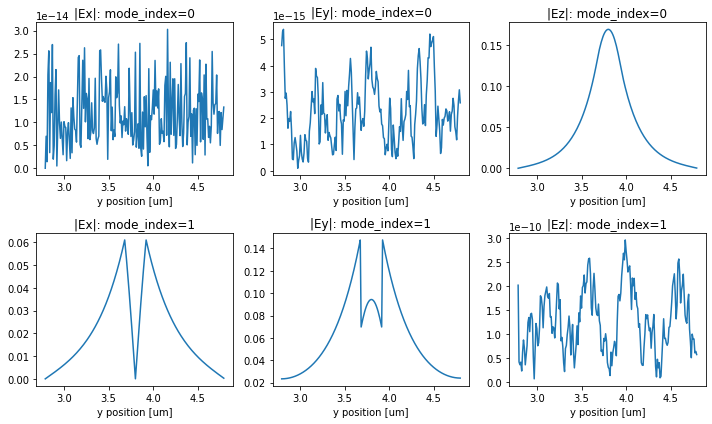

In [7]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, tight_layout=True, figsize=(10, 6))
abs(mode_data_0.field_data.Ex).plot(ax=ax1)
abs(mode_data_0.field_data.Ey).plot(ax=ax2)
abs(mode_data_0.field_data.Ez).plot(ax=ax3)
abs(mode_data_1.field_data.Ex).plot(ax=ax4)
abs(mode_data_1.field_data.Ey).plot(ax=ax5)
abs(mode_data_1.field_data.Ez).plot(ax=ax6)
ax1.set_title('|Ex|: mode_index=0')
ax2.set_title('|Ey|: mode_index=0')
ax3.set_title('|Ez|: mode_index=0')
ax4.set_title('|Ex|: mode_index=1')
ax5.set_title('|Ey|: mode_index=1')
ax6.set_title('|Ez|: mode_index=1')
plt.show()

From the above plots, we see that 

`mode_index=0` corresponds to exciting 0-th order TM mode (E=Ez) and 

`mode_index=1` corresponds to exciting 0-th order TE mode (E=Ey).

We can therefore switch the mode index accordingly based on our polarization.

Let's select Ey and create the source for it.

In [8]:
# mode_source = mode_solver.to_source(mode_spec=td.ModeSpec(num_modes=2), fwidth=fwidth, direction="+")
mode_source = td.ModeSource(
    size=mode_plane.size,
    center=mode_plane.center,
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    mode_spec=td.ModeSpec(num_modes=2),
    mode_index=1,
    direction='+'
)

In addition, let's monitor both the fields in plane as well as the output mode amplitudes into the fundamental TE mode.

In [9]:
# monitor steady state fields at central frequency over whole domain
field_monitor = td.FieldMonitor(
    center=[0, 0, 0],
    size=[td.inf, td.inf, 0],
    freqs=[freq0],
    name='field')

# monitor the mode amps on the output waveguide
lambdas_measure = np.linspace(0.8, 1.1, 1001)
freqs_measure = td.C_0 / lambdas_measure
# mode_monitor = mode_solver.to_monitor(mode=td.Mode(mode_index=1), freqs=freqs_measure, name='mode')
mode_monitor = td.ModeMonitor(
    size=mode_plane.size,
    center=mode_plane.center,
    freqs=freqs_measure,
    mode_spec=td.ModeSpec(num_modes=2),
    name='mode'
)

# lets reset the center to the on the right hand side of the simulation though
mode_monitor.center = [+wg_insert_x, wg_center_y, 0]

Define simulation. [(docs)](https://simulation.cloud/docs/html/api.html#simulation)

Here, we turn off the automatic shutoff factor by setting it to 0. This is because we will compute the spectrum by a fourier transform of the time response, and we would like to run the normalization simulation and the simulation with ring to exactly the same `run_time`.

In [10]:
# create normalization simulation (no ring)
sim0 = td.Simulation(
    size=[x_span, y_span, 1*dl],
    grid_size=[dl, dl, dl],
    structures=[background_box, waveguide],
    sources=[mode_source],
    monitors=[field_monitor, mode_monitor],
    run_time = run_time_norm,
    pml_layers=[td.PML(), td.PML(), None])

# create simulation (with ring)
sim = td.Simulation(
    size=[x_span, y_span, 1*dl],
    grid_size=[dl, dl, dl],
    structures=[background_box, waveguide, outer_ring, inner_ring],
    sources=[mode_source],
    monitors=[field_monitor, mode_monitor],
    run_time = run_time,
    pml_layers=[td.PML(), td.PML(), None])

----
Visualize structure, source, and modes. [(docs)](https://simulation.cloud/docs/html/api.html#plotting-tools)

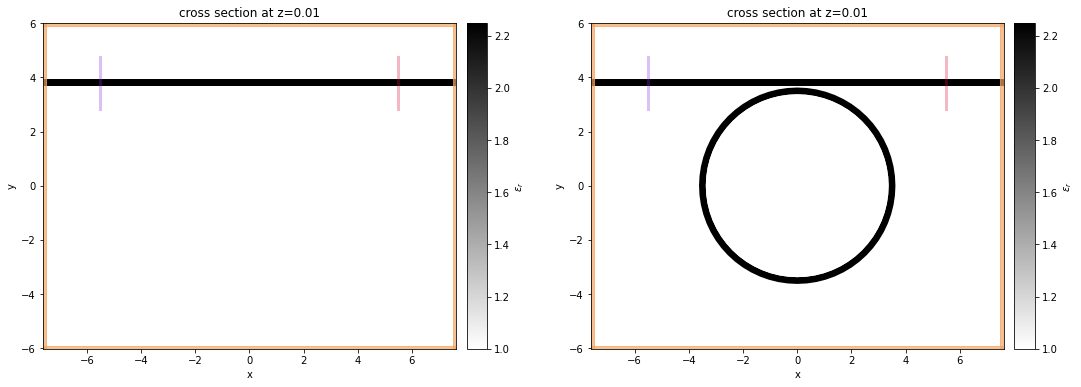

In [11]:
# plot the two simulations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sim0.plot_eps(z=0.01, ax=ax1)
sim.plot_eps(z=0.01, ax=ax2)
plt.show()

----
## Run Simulation
Run simulations on our server. [(docs)](https://simulation.cloud/docs/html/api.html#web-api)

In [12]:
# use function above to run simulation with and without ring
sim_data0 = web.run(sim0, task_name='normalization', path='data/simulation_data0.hdf5')
sim_data = web.run(sim, task_name='with_ring', path='data/simulation_data.hdf5')

[09:30:28] INFO     Uploaded task 'normalization' with task_id                  ]8;id=203367;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=684926;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#108\108]8;;\
                    'b0afb911-af19-45ef-913e-61f0285caff7'.

Output()

[09:30:29] status = queued                                                      ]8;id=669022;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=307354;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:30:40] status = preprocess                                                  ]8;id=643645;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=283842;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:31:00] status = running                                                     ]8;id=820425;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=686275;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:31:19] status = postprocess                                                 ]8;id=263633;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=963227;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:32:13] status = visualize                                                   ]8;id=85142;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=54513;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:32:45] status = success                                                     ]8;id=86762;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=805145;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:32:45] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=291127;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=101087;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#479\479]8;;\
                    "data/simulation_data0.hdf5"

Output()

Downloading... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

[09:33:10] INFO     loading SimulationData from data/simulation_data0.hdf5      ]8;id=169659;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=570675;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#300\300]8;;\

[09:33:12] INFO     Uploaded task 'with_ring' with task_id                      ]8;id=590966;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=59424;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#108\108]8;;\
                    '8498514f-3482-4f8c-b93e-2f1783b9f776'.

Output()

[09:33:13] status = queued                                                      ]8;id=645141;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=259086;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:33:26] status = preprocess                                                  ]8;id=519140;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=396742;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:33:45] status = running                                                     ]8;id=136940;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=344347;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:34:15] status = postprocess                                                 ]8;id=331346;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=643568;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:35:10] status = visualize                                                   ]8;id=953213;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=659947;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:35:41] status = success                                                     ]8;id=95834;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=304446;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:35:42] INFO     downloading file "monitor_data.hdf5" to                     ]8;id=716969;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=602922;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#479\479]8;;\
                    "data/simulation_data.hdf5"

Output()

Downloading... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

[09:39:55] INFO     loading SimulationData from data/simulation_data.hdf5       ]8;id=14666;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=552787;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#300\300]8;;\

In [13]:
print(sim_data.log)

Simulation domain Nx, Ny, Nz: [1524, 1204, 1]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 1.8349e+06.
Using subpixel averaging: True
Number of time steps: 2.8848e+05
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17
Compute source modes time (s):     0.4890
Compute monitor modes time (s):    3.7892

Rest of setup time (s):            1.3325

Starting solver...
- Time step    919 / time 1.59e-14s (  0 % done), field decay: 1.00e+00
- Time step  11539 / time 2.00e-13s (  4 % done), field decay: 2.45e-03
- Time step  23078 / time 4.00e-13s (  8 % done), field decay: 2.45e-05
- Time step  34617 / time 6.00e-13s ( 12 % done), field decay: 4.10e-07
Field decay smaller than shutoff factor, exiting solver.

Solver time (s):                   15.9053
Post-processing time (s):          32.9791



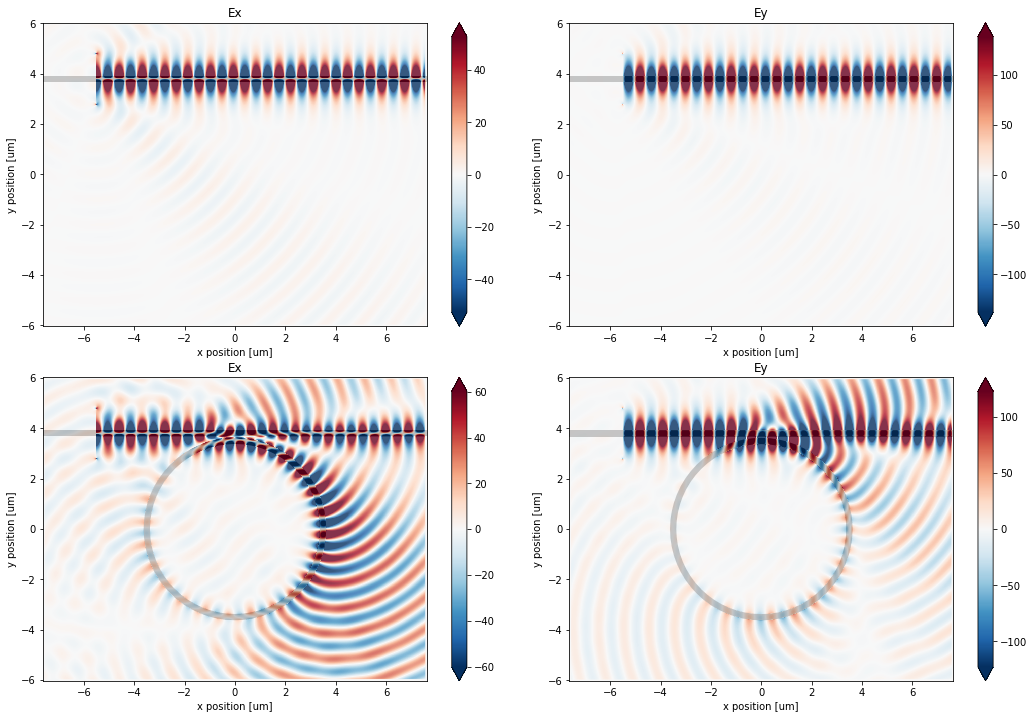

In [21]:
# visualize normalization run
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, tight_layout=True, figsize=(15, 10))

ax1 = sim_data0.plot_field('field', 'Ex', val='real', z=0, freq=freq0, ax=ax1)
ax2 = sim_data0.plot_field('field', 'Ey', val='real', z=0, freq=freq0, ax=ax2)
ax1.set_title('Ex')
ax2.set_title('Ey')

ax3 = sim_data.plot_field('field', 'Ex', val='real', z=0, freq=freq0, ax=ax3)
ax4 = sim_data.plot_field('field', 'Ey', val='real', z=0, freq=freq0, ax=ax4)
ax3.set_title('Ex')
ax4.set_title('Ey')

plt.show()

## Analyze Spectrum

Now let's analyze the mode amplitudes in the output waveguide.

First, let's grab the data to inspect it.

In [22]:
sim_data['mode']

ModeData(type='ModeData', data_dict={'amps': ModeAmpsData(type='ModeAmpsData', values=array([[[-5.05248437e-06-1.02058484e-05j,
         -5.93339182e-06-8.06679970e-06j,
         -6.53764871e-06-6.18163113e-06j, ...,
          4.44590149e-05+4.91370767e-05j,
          4.54404209e-05+4.70891082e-05j,
          4.63167219e-05+4.50370562e-05j],
        [-5.75654096e-01-1.57147642e-01j,
         -6.02030805e-01-1.29543625e-01j,
         -6.26004647e-01-9.83351590e-02j, ...,
         -5.82078918e-01+3.76104222e-01j,
         -5.73746105e-01+3.88623004e-01j,
         -5.65156256e-01+4.00957477e-01j]],

       [[-1.25644411e-08-3.04363621e-08j,
         -1.76115559e-08-2.93288758e-08j,
         -2.07882970e-08-2.65201273e-08j, ...,
          1.42872902e-07-2.08524741e-07j,
          1.40279515e-07-2.14297395e-07j,
          1.37573991e-07-2.19774465e-07j],
        [-8.99941735e-05+4.40413141e-05j,
         -9.17933303e-05+5.26115885e-05j,
         -8.57645681e-05+5.46338519e-05j, ...,
         -4.91670215e-04+2.46284634e-04j,
         -4.85248651e-04+2.62240350e-04j,
         -4.79696195e-04+2.70832645e-04j]]]), data_attrs={'units': 'sqrt(W)', 'long_name': 'mode amplitudes'}, f=array([3.74740573e+14, 3.74600098e+14, 3.74459728e+14, ...,
       2.72687337e+14, 2.72612948e+14, 2.72538599e+14]), mode_index=array([0, 1]), direction=['+', '-']), 'n_complex': ModeIndexData(type='ModeIndexData', values=array([[1.27235709+4.99550046e-18j, 1.27227589-1.55449342e-17j,
        1.27219471-2.19012994e-18j, ..., 1.20234572-4.09367175e-17j,
        1.2022856 +2.17786360e-17j, 1.2022255 +8.88320568e-18j],
       [1.15597591+2.75460004e-11j, 1.1558739 +2.78021364e-11j,
        1.15577198+2.80594458e-11j, ..., 1.08791287+4.23187107e-12j,
        1.08787214+4.20410114e-12j, 1.08783145+4.17643583e-12j]]), data_attrs={'units': 'None', 'long_name': 'complex effective index'}, f=array([3.74740573e+14, 3.74600098e+14, 3.74459728e+14, ...,
       2.72687337e+14, 2.72612948e+14, 2.72538599e+14]), mode_index=array([0, 1]))})

As we see, the mode amplitude data is complex-valued with three 3 dimensions:
* index into the mode order returned by solver (remember, we wanted mode_index=1 for fundamental TE).
* direction of the propagation (for decomposition).
* frequency.

Let's select into the first two dimensions to get mode amplitudes as a function of frequency and divide the results with a ring by the normalization.

In [23]:
mode_data = sim_data['mode'].amps.sel(mode_index=1, direction='+')
mode_data0 = sim_data0['mode'].amps.sel(mode_index=1, direction='+')
transmission_amps = mode_data / mode_data0

Now let's plot the data.

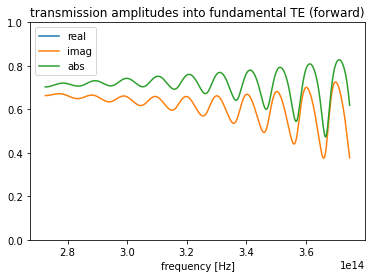

In [24]:
f, ax = plt.subplots()
transmission_amps.real.plot.line(x='f', ax=ax, label='real')
transmission_amps.imag.plot.line(x='f', ax=ax, label='imag')
abs(transmission_amps).plot.line(x='f', ax=ax, label='abs')
ax.legend()
ax.set_title('transmission amplitudes into fundamental TE (forward)')
ax.set_ylim(0, 1)
plt.show()